<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance==0.1.67 from https://files.pythonhosted.org/packages/dd/ea/c878476f88405f64dee5aefca5f87d75e88058987d41141c73deecc0b63b/yfinance-0.1.67-py2.py3-none-any.whl.metadata
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.40
    Uninstalling yfinance-0.2.40:
      Successfully uninstalled yfinance-0.2.40


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
'mamba' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for nbformat==4.2.0 from https://files.pythonhosted.org/packages/f2/fd/f3d5316d3d3c295993cf7d08d0105f2454acef9db363b33b72e3aed0808e/nbformat-4.2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/153.3 kB ? eta -:--:--
   ------- ------------------------------- 30.7/153.3 kB 325.1 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/153.3 kB 279.3 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/153.3 kB 363.1 kB/s eta 0:00:01
   -------------------- ------------------ 81.9/153.3 kB 381.3 kB/s eta 0:00:01
   --------------------------- ---------- 112.6/153.3 kB 504.4 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/153.3 kB 532.5 kB/s eta 0:00:01
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
anaconda-client 1.12.1 requires nbformat>=4.4.0, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires nbformat==5.9.2, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
jupyter-server 1.23.4 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.5.13 requires nbformat>=5.0, but you have nbformat 4.2.0 which is incompatible.
nbconvert 6.5.4 requires nbformat>=5.1, but you have nbformat 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [49]:
import yfinance as yf

# Ticker function to get data for Tesla
tsla = yf.Ticker("TSLA")



In [44]:
pip install pandas==1.3.5


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
      --------------------------------------- 0.1/4.7 MB 656.4 kB/s eta 0:00:08
     - -------------------------------------- 0.2/4.7 MB 1.1 MB/s eta 0:00:05
     - -------------------------------------- 0.2/4.7 MB 1.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.3/4.7 MB 1.4 MB/s eta 0:00:04
     --- ------------------------------------ 0.4/4.7 MB 1.3 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/4.7 MB 1.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.5/4.7 MB 1.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.5/4.7 MB 1.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.5/4.7 MB 1.5 MB/s eta 0:00:03
     -----

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2474 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-311\pandas
  creating build\lib.win-amd64-cpython-311\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-311\pandas\api
  creating build\lib.win-amd64-cpython-311\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-311\p

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [45]:
pip install --upgrade yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/tesla.json


'wget' is not recognized as an internal or external command,
operable program or batch file.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [ ]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tsla = yf.Ticker("TSLA")

# Get historical data for the maximum available period
tesla_data = tsla.history(period="max")

# Convert the index to a timezone-naive datetime index if needed
if isinstance(tesla_data.index, pd.DatetimeIndex):
    tesla_data.index = tesla_data.index.tz_localize(None)

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Print a snippet of the HTML content (optional)
print(html_data[:500])  # Print the first 500 characters of the HTML content



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup`.


In [11]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML content (optional)
print(soup.prettify()[:500])  # Print the first 500 characters of the parsed HTML content


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [12]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing Tesla revenue (quarterly)
table = soup.find_all("tbody")[1]

# Extract rows from the table
rows = table.find_all("tr")

# Initialize empty lists to store data
dates = []
revenues = []

# Loop through rows and extract data
for row in rows:
    # Extract columns
    columns = row.find_all("td")
    # Extract date and revenue
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    # Append data to lists
    dates.append(date)
    revenues.append(revenue)

# Create DataFrame
tesla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# Display the DataFrame
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [15]:
# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [16]:
import yfinance as yf

# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Fetch historical stock data
gamestop_stock_data = gamestop_ticker.history(period="max")

# Display the first few rows of the data
print(gamestop_stock_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [17]:
import yfinance as yf

# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gamestop_ticker.history(period="max", auto_adjust=True)

# Display the first few rows of the data
print(gme_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578048  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [18]:
import yfinance as yf

# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gamestop_ticker.history(period="max", auto_adjust=True)

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [23]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print("Failed to download webpage. Status code:", response.status_code)


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [24]:
from bs4 import BeautifulSoup

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML content using Beautiful Soup methods
# For example, you can find elements by tag name, class, id, etc.

# Example: Find the title of the webpage
title = soup.title
print("Title of the webpage:", title.text)


Title of the webpage: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [27]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML data using Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table containing GameStop revenue
    table = soup.find_all("tbody")[1]
    
    # Initialize lists to store data
    dates = []
    revenues = []
    
    # Loop through the rows of the table
    for row in table.find_all('tr'):
        # Extract data from each row
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')
        
        # Append data to lists
        dates.append(date)
        revenues.append(revenue)
    
    # Create DataFrame
    gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})
    
    # Convert Revenue column to numeric
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])
    
    print("GameStop revenue DataFrame extracted successfully.")
else:
    print("Failed to download webpage. Status code:", response.status_code)


GameStop revenue DataFrame extracted successfully.


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [28]:
print(gme_revenue.tail())


          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [51]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


NameError: name 'tesla_data' is not defined

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


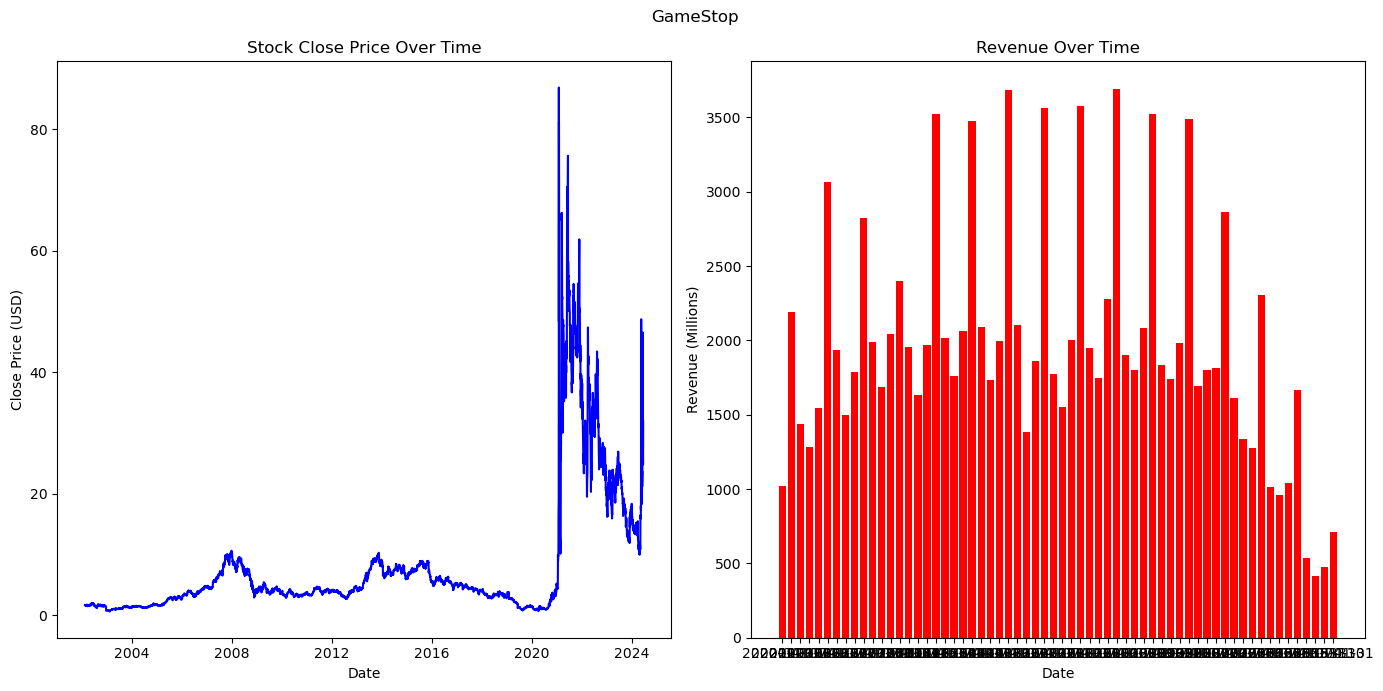

In [31]:
# Assuming you have already defined and stored GameStop stock data and revenue data in variables
# gme_data and gme_revenue respectively

# Call make_graph function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
